# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [1]:
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
# we load a few packages
library(ggplot2)
library(corrplot)
library(reshape2)
library(caret)
library(MASS) # for LDA
library(klaR) # for pls
library(pls)
library(e1071)# for pls
library(pROC) # for pls
library(vegan)
require(scales)
require(gridExtra);

corrplot 0.84 loaded
Loading required package: lattice

Attaching package: ‘pls’

The following object is masked from ‘package:caret’:

    R2

The following object is masked from ‘package:corrplot’:

    corrplot

The following object is masked from ‘package:stats’:

    loadings

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: permute
This is vegan 2.4-5

Attaching package: ‘vegan’

The following object is masked from ‘package:pls’:

    scores

The following object is masked from ‘package:klaR’:

    rda

The following object is masked from ‘package:caret’:

    tolerance

Loading required package: scales
Loading required package: gridExtra


## IRMS

Let's load real data. Assume we want to discriminate coffee beans according to their origin. Therefore we perform Isotope Ratio Mass Spectrometry, which allows to determine the isotopic ration for several nucleus. In this case we will measure only the ratio for carbon in caffeine. 

In [3]:
#rm(list=ls(all=TRUE))

load(url('https://github.com/jwist/chemometrics/raw/master/datasets/coffeeMulti.rda'))
d <- coffeeMulti$irms
dim(d)

[1] 34  6

We have 34 samples and if we look at the country they are from we find out the following:

In [4]:
names(d)

[1] "code"       "country"    "department" "caffeine1"  "caffeine2" 
[6] "mean"

In [5]:
summary(d$country)

Brasil Colombia     Peru 
      11       15        8

We can look to the data in more details. Let's display the first 3 rows (it is always a good idea to look at the data, sometimes there are difficult to diplay because too lengthy. In that case a plot will do the job)

In [6]:
d[1:3,]
# uncomment the following line to run only two classes
#levels(d$country) <- c("otros","Colombia","otros")

,code,country,department,caffeine1,caffeine2,mean
5,1172,Colombia,Tolima,-28.285,-27.936,-28.111
6,1173,Colombia,Tolima,-28.931,-28.800,-28.866
7,1198,Brasil,Otro,-28.056,-28.274,-28.165


We discover that we have two replicates (two columns) and an additional column with means.

Let's make a simple boxplot graph to visualize the data.

In [17]:
d[d$country == "Colombia" | d$country == "Peru",]

,code,country,department,caffeine1,caffeine2,mean
5,1172,Colombia,Tolima,-28.285,-27.936,-28.111
6,1173,Colombia,Tolima,-28.931,-28.800,-28.866
8,1199,Colombia,Huila,-28.154,-28.022,-28.088
10,1201,Colombia,Huila,-28.198,-28.372,-28.285
14,1208,Colombia,Huila,-28.406,-28.505,-28.456
16,1216,Colombia,Huila,-27.722,-27.735,-27.729
18,1240,Colombia,Narino,-28.605,-28.716,-28.661
19,1241,Colombia,Narino,-28.503,-28.163,-28.333
20,1242,Colombia,Narino,-28.835,-29.207,-29.021
21,1243,Colombia,Narino,-28.387,-28.379,-28.383



	F test to compare two variances

data:  hx and hy
F = 1, num df = 99, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6728417 1.4862338
sample estimates:
ratio of variances 
                 1 



	F test to compare two variances

data:  hx and hy
F = 0.99988, num df = 99, denom df = 99, p-value = 0.9995
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6727589 1.4860509
sample estimates:
ratio of variances 
          0.999877 


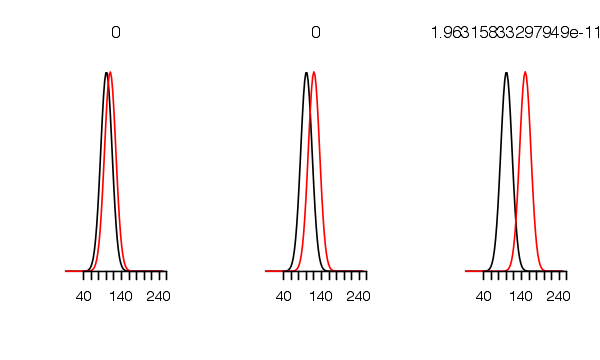

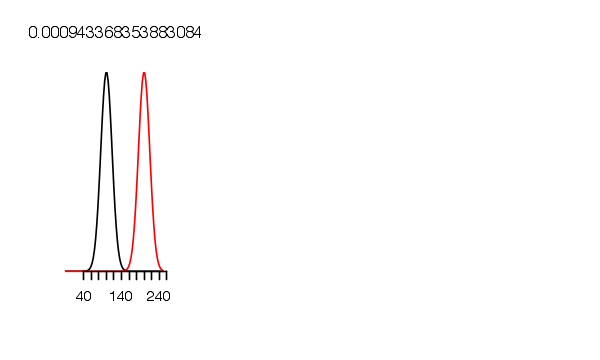

In [9]:
options(repr.plot.width=5, repr.plot.height=3)

mean=100; sd=15
lb=80; ub=120

x <- seq(-10,10,length=100)*sd + mean
hx <- dnorm(x,mean,sd)

hy <- dnorm(x,mean+10,sd)
s10 <- t.test(hx, hy)$statistic
var.test(hx, hy)

hy <- dnorm(x,mean+20,sd)
s20 <- t.test(hx, hy)$statistic

hy <- dnorm(x,mean+50,sd)
s50 <- t.test(hx, hy)$statistic

hy <- dnorm(x,mean+100,sd)
s100 <- t.test(hx, hy)$statistic

var.test(hx, hy)

par(mfrow=c(1,3))

plot(x, hx, type="n", xlab="", ylab="",
  main=s10, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean+10,sd), col="red")
axis(1, at=seq(40, 260, 20), pos=0)


plot(x, hx, type="n", xlab="", ylab="",
  main=s20, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean+20,sd), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

plot(x, hx, type="n", xlab="", ylab="",
  main=s50, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean+50,sd), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

plot(x, hx, type="n", xlab="", ylab="",
  main=s100, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean+100,sd), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

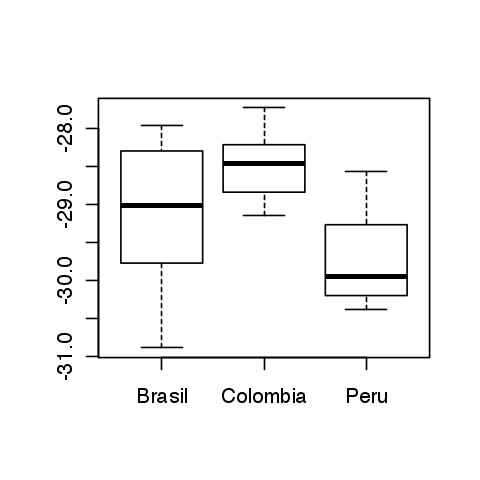

In [10]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(tapply(d$mean,d$country,function(x) x))

Or if we prefer we can diplay the density distribution of the data, which gives a similar information as boxplots.

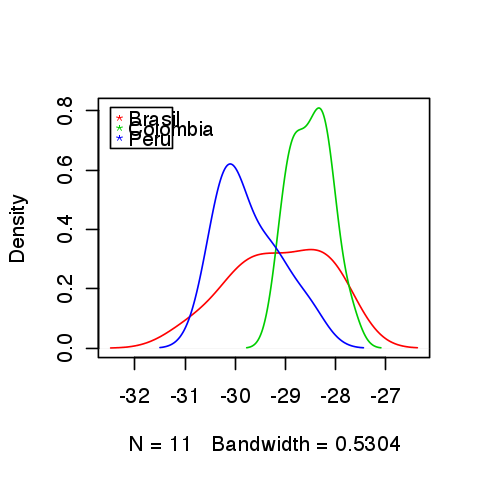

In [11]:
# here we plot the distribution for each class
x <- tapply(d$mean,d$country,function(x) x)
xlims <- range(unlist(tapply(d$mean,d$country,function(x) unlist(range(density(x)$x)))))
ylims <- range(unlist(tapply(d$mean,d$country,function(x) unlist(range(density(x)$y)))))
plot(density(x[1][[1]]),type='l', xlim=xlims, ylim=ylims, col=2, main=" ")
lines(density(x[2][[1]]), col=3)
lines(density(x[3][[1]]), col=4)
legend(min(xlims),max(ylims),levels(d$country), col=2:4, pch="*")

In [12]:
# then we start the calculations
means <- tapply(d$mean,d$country,mean)      # means
vars <- tapply(d$mean,d$country,var)        # variances
sds <- sqrt(vars)                           # standard deviation
ns <- tapply(d$mean,d$country,length)
# we perform a multiple t-test, that is we calculate t-test between
# all the pairs of countries, and compute the p-values
# from http://www.chem.utoronto.ca/coursenotes/analsci/stats/ttest.html
t <- dist(means) / sqrt( abs(combn(sds^2/ns,2,sum)) )
dof <- abs(combn(sds^2/ns,2,sum))^2 / combn(sds^4/(ns^2*(ns - 1)),2,sum)
#dof <- sum(ns) - length(levels(d$country)) # sometimes the d.o.f are also computed in that simpler manner
p <- 2*pt(-abs(t),df=dof);

In [13]:
t # value of t
dof # degree of freedom
p # p-value associated to t 
  # (probability of finding t if null hypothesis is true) 
  # should be small!

           Brasil Colombia
Colombia 2.052607         
Peru     1.634253 4.976158

[1] 12.61633 16.90348 10.12954

               Brasil     Colombia
Colombia 0.0614565181             
Peru     0.1206906508 0.0005354635

Let's make a simple t-test between Brazil and Colombia.

In [14]:
t.test(d$mean[d$country=="Brasil"], d$mean[d$country=="Colombia"])


	Welch Two Sample t-test

data:  d$mean[d$country == "Brasil"] and d$mean[d$country == "Colombia"]
t = -2.0526, df = 12.616, p-value = 0.06146
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.28761786  0.03492695
sample estimates:
mean of x mean of y 
-29.12955 -28.50320 


In [15]:
t.test(d$mean[d$country=="Peru"], d$mean[d$country=="Colombia"])


	Welch Two Sample t-test

data:  d$mean[d$country == "Peru"] and d$mean[d$country == "Colombia"]
t = -4.9762, df = 10.13, p-value = 0.0005355
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.7646741 -0.6744259
sample estimates:
mean of x mean of y 
-29.72275 -28.50320 


In [16]:
var.test(d$mean[d$country=="Peru"], d$mean[d$country=="Colombia"])


	F test to compare two variances

data:  d$mean[d$country == "Peru"] and d$mean[d$country == "Colombia"]
F = 2.4574, num df = 7, denom df = 14, p-value = 0.1443
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.7270675 11.2946238
sample estimates:
ratio of variances 
          2.457439 


In [17]:
p.adjust(c(0.0614565181, 0.1206906508, 0.0005354635), "bonferroni")

[1] 0.18436955 0.36207195 0.00160639

In [18]:

# this complex caluclation can be replaced by this single line
m <- t.test(d$mean[d$country=="Colombia"],d$mean[d$country=="Brasil"])
m2 <- t.test(d$mean[d$country=="Colombia"],d$mean[d$country=="Peru"])
m3 <- t.test(d$mean[d$country=="Brasil"],d$mean[d$country=="Peru"])


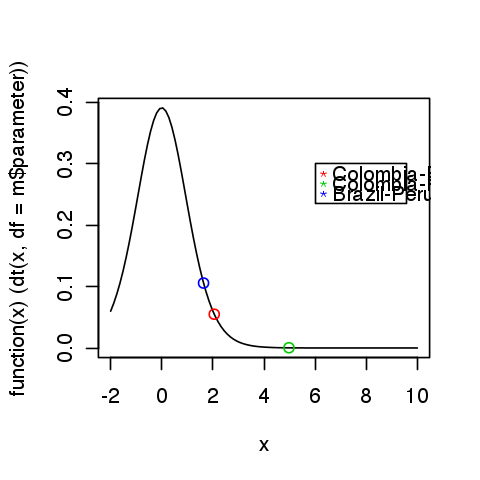

In [19]:
plot(function(x)(dt(x,df=m$parameter)),xlim=c(-2,10)); points(m$statistic,dt(m$statistic,df=m$parameter), col=2, xlab=("d"))
points(m2$statistic,dt(m2$statistic,df=m2$parameter), col=3)
points(m3$statistic,dt(m3$statistic,df=m3$parameter), col=4)
legend(6,0.3,c("Colombia-Brazil", "Colombia-Peru", "Brazil-Peru"), col=2:4, pch="*")


### Conclusion
- we cannot discriminate coffees from those 3 countries based on IRMS data

But

 - multiple t-test is not well suited because the 5% error is multiplicative this means that for 3 tests with 5% error each, the global error is approx 15% 
 - Moreover, t-test assumes 1) homogeneity of variance, 2) normal distributions within all groups and 3) independant variables.

In [20]:
#ANOVA fixes the first two issues. For non-normal distribution use Kruskal-W
#allis test. In this case the test reject the null hypothesis meaning that t
#he populations are NOT identical. 
# annova is best suited for that purpose
fit <- aov(mean ~ country, data=d)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
country      2  8.064   4.032   8.879 0.000894 ***
Residuals   31 14.077   0.454                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [21]:
# F-value is Mean Sq Residuals / Mean Sq country
pf(8.879,2,31,lower.tail = FALSE)
# the p-value is small indicating that the distribution's difference is
# significant


[1] 0.0008941185

In [22]:
# Kruskal-Wallis test is in principle suited for comparison of population that
# are different in size. Small p-values indicates that the null hypothesis is
# safely rejected: populations are too far apart and cannot be explained by randomness.
kruskal.test(mean ~ country, data=d)



	Kruskal-Wallis rank sum test

data:  mean by country
Kruskal-Wallis chi-squared = 11.506, df = 2, p-value = 0.003174


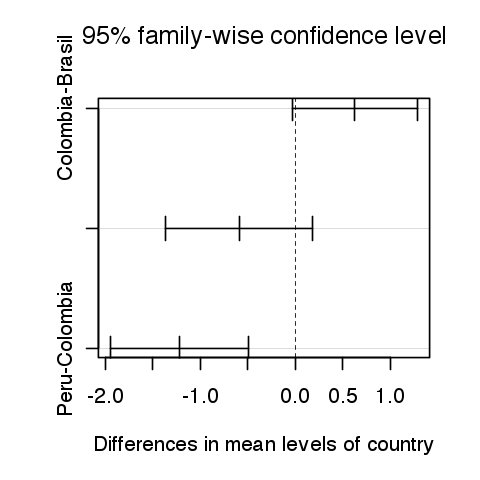

In [23]:
# since data exhibits significance... fortunately,
# post hoc test can be performed to understand how well pairwise populations
# can be separated
#TukeyHSD(fit, "country", ordered = TRUE);
plot(TukeyHSD(fit, "country"))

### conclusion

- Peru is different from  Colombia
- Colombia cannot be distinguished from Brazil
- Peru and Brazil cannot be distinguished
